# 1. Подготовительные операции

# 1.1. Инициализация

In [511]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import matplotlib.colors as clr 

def getComplexDomain(halfdim, scale) -> np.ndarray:

    a = np.arange(-halfdim, halfdim)
    z = np.zeros(shape=(2*halfdim, 2*halfdim), dtype=complex)
    
    for j in np.arange(0, 2*halfdim):
        z[j,] = (a+(j-halfdim+2)*1j).astype(complex)

    return z*scale

def wrapTo2Pi(Lambdas):
    
    wrapped = Lambdas
    
    for kk in range(len(Lambdas)):
        for k in range(len(Lambdas[kk])):
            positiveInput = (Lambdas[kk][k] > 0);
            wrapped[kk][k] = np.mod(Lambdas[kk][k], 2*np.pi)

            if Lambdas[kk][k] == 0 & positiveInput:
                wrapped[kk][k] = 2*np.pi

    return wrapped


# Графики непосредственно в ноутбуке
%matplotlib inline

fontName = "Liberation Serif"    # Название шрифта
rcParams["mathtext.fontset"] = "custom" # Пользовательские параметры графика
rcParams["mathtext.rm"] = fontName  # Обычный стиль
rcParams["mathtext.bf"] = fontName + ":bold"    # Жирный
rcParams["mathtext.it"] = fontName + ":italic"  # Курсив

fontSize=10 # Размер шрифта графиков
fontType='' # Тип шрифта графиков
# Цвет графиков
tColor = "#0000FF"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
fColor="#FF6600"; # Цвет графиков в частотной области
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности

# 1.2 Формирование значений основных параметров

In [512]:
# Параметры области определения функций
nMax=300 # Количество отсчетов по каждой полуоси
nScale=.1 # Коэффициент масштабирования

# Время запуска текста в видео, с
startText0=5
startText1=10
frameRate=25 # Частота кадрирования
videoDuration=15 # Длительность видео
fCount=frameRate*videoDuration # Количество кадров

# 2. Моделирование комплексных сигналов

# 2.1. Графическое изображение функции f(z)=z

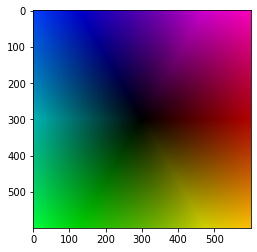

In [513]:
# Формирование изображения комплексной функции
# f(z)=z
z = getComplexDomain(nMax, nScale) # Область определения
f = z; # Формирование значений

# Формирование изображения HSV
hsv1 = np.zeros(shape=(2*nMax, 2*nMax, 3))

hsv1[:,:,0] = wrapTo2Pi(np.angle(f))/(2*np.pi) # Тон
hsv1[:,:,1] = 1 # Насыщенность
hsv1[:,:,2] = np.divide(np.abs(f), np.max(np.abs(f))) # Яркость

rgb1 = clr.hsv_to_rgb(hsv1) # Преобразование в формат RGB
plt.imshow(rgb1); # Визуализация

# 2.2 Графическое изображение функции f(z)=z*exp(z)

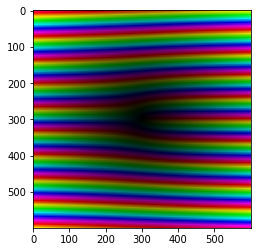

In [514]:
# Формирование изображения комплексной функции
# f(z)=z*exp(z)
f = np.multiply(z, np.exp(z)) # Формирование значений

# Формирование изображения HSV
hsv2 = np.zeros(shape=(2*nMax, 2*nMax, 3))

hsv2[:,:,0] = wrapTo2Pi(np.angle(f))/(2*np.pi) # Тон
hsv2[:,:,1] = 1 # Насыщенность
hsv2[:,:,2] = np.divide(np.abs(z), np.max(np.abs(z))) # Яркость
     
rgb2 = clr.hsv_to_rgb(hsv2) # Преобразование в формат RGB
plt.imshow(rgb2) # Визуализация

# 2.3 Графическое изображение функции f(z)=(z^2-i)/(z^2+i)

/Users/nikita/Desktop/pythonexcel/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


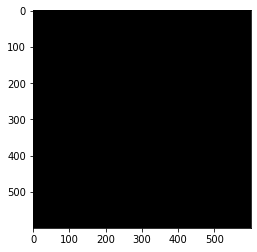

In [542]:
# Формирование изображения комплексной функции
# f(z)=(z^2-i)/(z^2+i)
nScale = nScale*.05 # Изменение масштаба
z = getComplexDomain(nMax, nScale) # Область определения

f = np.divide(np.power(z, 2-1j), np.power(z, 2+1j)) # Формирование значений

# Формирование изображения HSV
hsv3 = np.zeros(shape=(2*nMax, 2*nMax, 3))

hsv3[:,:,0] = wrapTo2Pi(np.angle(f))/(2*np.pi) # Тон
hsv3[:,:,1] = 1 # Насыщенность
hsv3[:,:,2] = np.divide(np.abs(f), np.max(np.abs(f))) # Яркость

rgb3 = clr.hsv_to_rgb(hsv3) # Преобразование в формат RGB
plt.imshow(rgb3) # Визуализация